# Visualizing

### Using game data_bigcontest

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="darkgrid")
from scipy import stats

In [2]:
train_activity = pd.read_csv('C:/Bigcontest/train_activity.csv')
train_label = pd.read_csv('C:/Bigcontest/train_label.csv')

In [3]:
train_chat = train_activity[['acc_id','guild_chat','party_chat']]

In [4]:
train_chat.head()

,acc_id,guild_chat,party_chat
0,3dc6f2875dc6e6f35b9e2bdb25b391a8003386ff23becd...,-0.343293,-0.275174
1,3dc6f2875dc6e6f35b9e2bdb25b391a8003386ff23becd...,-0.343293,-0.275174
2,b8856358ff62e596fa07e3e40b8e7fd4b7729263c72b44...,-0.343293,-0.275174
3,b8856358ff62e596fa07e3e40b8e7fd4b7729263c72b44...,-0.343293,-0.275174
4,b8856358ff62e596fa07e3e40b8e7fd4b7729263c72b44...,-0.343293,-0.275174


In [5]:
train_chat = train_chat.groupby(['acc_id'], as_index = False).mean()

In [6]:
train_chat.head()

,acc_id,guild_chat,party_chat
0,0000264b01392acfde44f9d8494f112a701dc5d3e5fda6...,-0.343293,-0.275174
1,0001f130e89288ff0df167b998f6eb7085687f411fcb72...,-0.343293,-0.275174
2,00028f0ad71c07f48aef465fd0c98ba6e3f0f3de3d2f7d...,-0.343293,-0.275174
3,00036e5b6a197c196fa10fc0ad4e2853b22294dff64d27...,-0.343293,-0.270133
4,00037fe8e712041a476b8b1b827583cbc34895844057f0...,-0.343293,-0.275174


In [7]:
train_chat = pd.merge(train_chat, train_label, how='outer', on='acc_id')

In [8]:
train_chat.head(20)

,acc_id,guild_chat,party_chat,label
0,0000264b01392acfde44f9d8494f112a701dc5d3e5fda6...,-0.343293,-0.275174,week
1,0001f130e89288ff0df167b998f6eb7085687f411fcb72...,-0.343293,-0.275174,retained
2,00028f0ad71c07f48aef465fd0c98ba6e3f0f3de3d2f7d...,-0.343293,-0.275174,retained
3,00036e5b6a197c196fa10fc0ad4e2853b22294dff64d27...,-0.343293,-0.270133,month
4,00037fe8e712041a476b8b1b827583cbc34895844057f0...,-0.343293,-0.275174,2month
5,0003b127aa1c0c34490db8817574482464aad9f99cffde...,-0.343293,-0.275174,month
6,0004733c4175d61e67d1ec9d3602f6c3341180800bc8bf...,-0.343293,-0.275174,month
7,00047f6584e6bcfed540e1bc53651c0c27f02c5bc53091...,-0.343293,-0.275174,2month
8,0004a2a2f32479b2e0ff35b2a3b9d77f9949a1d2f3f16c...,-0.343293,-0.275174,retained
9,0006502148dc2533ef4ac4b9939ee19f18483a7c3c7256...,-0.343293,-0.153116,month


In [9]:
train_chat = train_chat[(train_chat['guild_chat'] > -0.33) & (train_chat['party_chat'] > -0.275)]

In [10]:
train_chat.head()

,acc_id,guild_chat,party_chat,label
20,000c7d37960d5261d7680320227e07e53580f654cf0322...,2.036069,1.275932,retained
24,000f75da470b53684a56be7c49083451cfa58db4573900...,1.548961,5.138034,retained
32,001a711324abb3f8c487779f6be2cdc052918390eba1b6...,1.655152,0.533324,retained
36,001ea7c5f0b1e3e4ce0794d0c812c9782248ddcec67c1f...,-0.128445,-0.186169,retained
39,001ed54e52274af3df2789074a12e1548c6d8b01b358eb...,1.957968,1.070702,retained


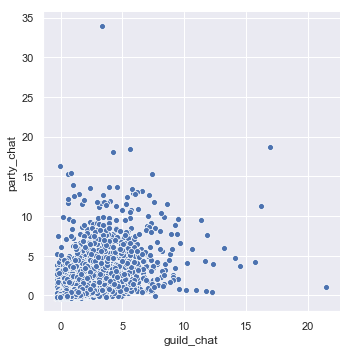

In [11]:
sns.relplot(x='guild_chat', y='party_chat', data=train_chat)

In [12]:
np.random.seed(10)

In [13]:
day1 = np.arange(100)

In [14]:
value1 = np.random.randn(100).cumsum()

In [15]:
df1 = pd.DataFrame({'day': day1, 'value': value1}, index = None)

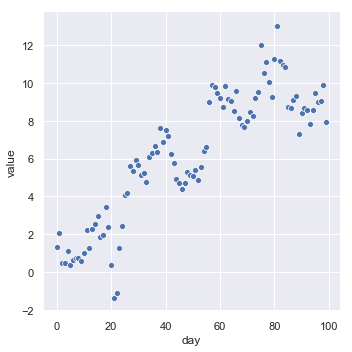

In [16]:
sns.relplot(x='day', y='value', data=df1)

# Emphasizing Continuity by using line plots

#### add 'kind' parameter

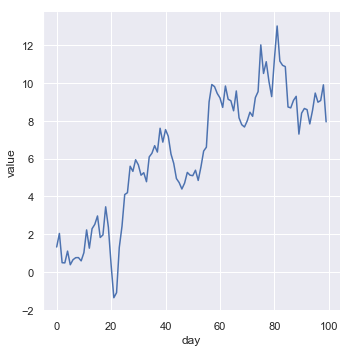

In [17]:
g = sns.relplot(x='day', y='value', kind='line', data=df1)

# Aggregation and representing uncertainty

In [18]:
day2 = np.random.randint(1,20, size=100)

In [19]:
day2.sort()

In [20]:
value2 = np.random.randn(100).cumsum()

In [21]:
df2 = pd.DataFrame({'day': day2, 'value':value2})

#### If you use dataframe that has multiple value for a x variable,

#### relplot plot the mean and the 95% confidence interval around the mean

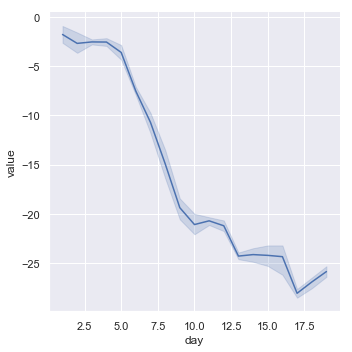

In [22]:
sns.relplot(x='day', y='value', kind='line', data=df2)

#### It cause time delay. So, if you want to disable them. Use 'ci' parameter

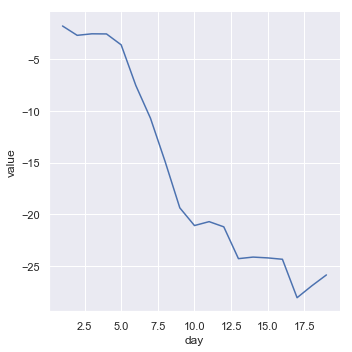

In [23]:
sns.relplot(x='day', y='value',ci=None, kind='line', data=df2)

#### Especially with larger data, It is recommended to represent the spread of distribution by plotting standard deviation instead of confidential interval

#### ci='sd'

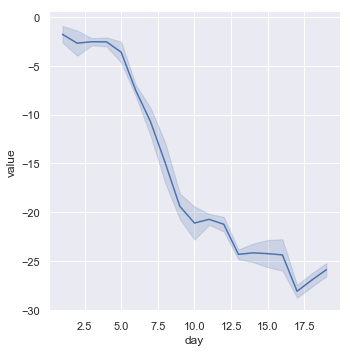

In [24]:
sns.relplot(x='day', y='value',ci='sd', kind='line', data=df2)

#### To turn off aggregation, set the estimator to None

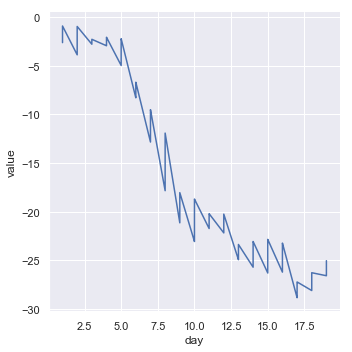

In [25]:
sns.relplot(x='day', y='value', estimator=None, kind='line', data=df2)